In [2]:
import pandas as pd


employee_df = pd.read_csv(r"C:\Users\GILL\archive (8)\employee_data.csv")
engagement_df = pd.read_csv(r"C:\Users\GILL\archive (8)\employee_engagement_survey_data.csv")
recruitment_df = pd.read_csv(r"C:\Users\GILL\archive (8)\recruitment_data.csv")
training_df = pd.read_csv(r"C:\Users\GILL\archive (8)\training_and_development_data.csv")

# Basic info
for name, df in {
    "Employee": employee_df,
    "Engagement": engagement_df,
    "Recruitment": recruitment_df,
    "Training": training_df
}.items():
    print(f"===== {name} Dataset =====")
    print(df.shape)
    print(df.columns)
    print(df.head(2))
    print(df.info())
    print("\n\n")


===== Employee Dataset =====
(3000, 26)
Index(['EmpID', 'FirstName', 'LastName', 'StartDate', 'ExitDate', 'Title',
       'Supervisor', 'ADEmail', 'BusinessUnit', 'EmployeeStatus',
       'EmployeeType', 'PayZone', 'EmployeeClassificationType',
       'TerminationType', 'TerminationDescription', 'DepartmentType',
       'Division', 'DOB', 'State', 'JobFunctionDescription', 'GenderCode',
       'LocationCode', 'RaceDesc', 'MaritalDesc', 'Performance Score',
       'Current Employee Rating'],
      dtype='object')
   EmpID FirstName LastName  StartDate ExitDate                    Title  \
0   3427     Uriah  Bridges  20-Sep-19      NaN  Production Technician I   
1   3428     Paula    Small  11-Feb-23      NaN  Production Technician I   

        Supervisor                      ADEmail BusinessUnit EmployeeStatus  \
0     Peter Oneill  uriah.bridges@bilearner.com         CCDR         Active   
1  Renee Mccormick    paula.small@bilearner.com           EW         Active   

   ...         

In [3]:

engagement_df.rename(columns={'Employee ID': 'EmpID'}, inplace=True)
training_df.rename(columns={'Employee ID': 'EmpID'}, inplace=True)
recruitment_df.rename(columns={'Applicant ID': 'EmpID'}, inplace=True)


In [4]:
merged_df = (
    employee_df
    .merge(engagement_df, on='EmpID', how='left')
    .merge(training_df, on='EmpID', how='left')
    .merge(recruitment_df, on='EmpID', how='left')
)


In [5]:
print(merged_df.shape)
print(merged_df.isnull().sum().sort_values(ascending=False).head(10))


(3000, 55)
ExitDate                  1467
TerminationDescription    1467
FirstName                    0
LastName                     0
StartDate                    0
Title                        0
EmpID                        0
Supervisor                   0
ADEmail                      0
EmployeeStatus               0
dtype: int64


In [6]:

threshold = 0.6 * len(merged_df)
merged_df = merged_df.loc[:, merged_df.isnull().sum() < threshold]

# Fill small missing bits
merged_df['Engagement Score'].fillna(merged_df['Engagement Score'].mean(), inplace=True)
merged_df['Satisfaction Score'].fillna(merged_df['Satisfaction Score'].mean(), inplace=True)
merged_df['Work-Life Balance Score'].fillna(merged_df['Work-Life Balance Score'].mean(), inplace=True)
merged_df['Training Outcome'].fillna('Unknown', inplace=True)
merged_df['Education Level'].fillna('Not Specified', inplace=True)


C:\Users\GILL\AppData\Local\Temp\ipykernel_22884\4277241950.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_df['Engagement Score'].fillna(merged_df['Engagement Score'].mean(), inplace=True)
C:\Users\GILL\AppData\Local\Temp\ipykernel_22884\4277241950.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting val

In [7]:
print(merged_df.duplicated().sum())
print(merged_df.describe(include='all').T.head(10))


0
                 count unique                           top  freq    mean  \
EmpID           3000.0    NaN                           NaN   NaN  2500.5   
FirstName         3000   1597                        Harley     9     NaN   
LastName          3000   1137                         Smith    10     NaN   
StartDate         3000   1496                     11-Nov-19     7     NaN   
ExitDate          1533    820                     21-Jul-23     8     NaN   
Title             3000     32       Production Technician I  1321     NaN   
Supervisor        3000   2952                    John Smith     3     NaN   
ADEmail           3000   2998  larissa.warner@bilearner.com     2     NaN   
BusinessUnit      3000     10                           NEL   304     NaN   
EmployeeStatus    3000      5                        Active  2458     NaN   

                       std     min      25%     50%      75%     max  
EmpID           866.169729  1001.0  1750.75  2500.5  3250.25  4000.0  
FirstNam

In [8]:
merged_df.drop_duplicates(inplace=True)


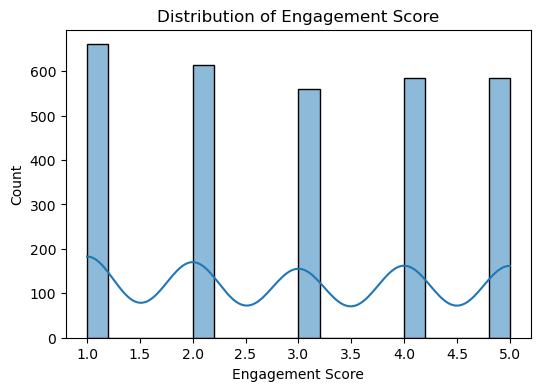

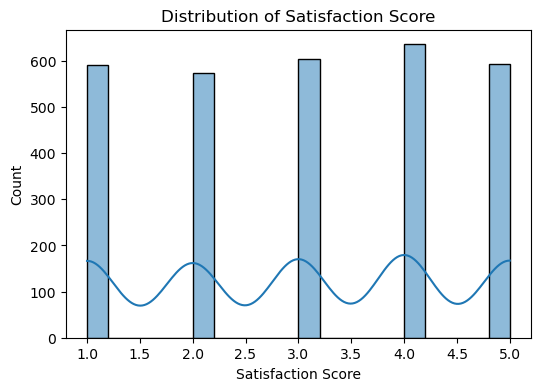

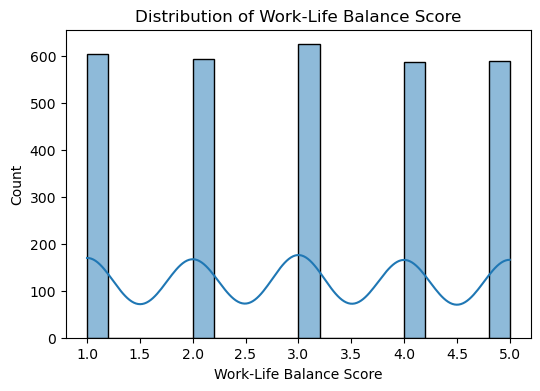

KeyError: 'Years at Company'

<Figure size 600x400 with 0 Axes>

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Numeric columns
numeric_cols = ['Engagement Score', 'Satisfaction Score', 'Work-Life Balance Score', 'Years at Company', 'Age']

for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(merged_df[col], kde=True, bins=20)
    plt.title(f'Distribution of {col}')
    plt.show()

# Categorical columns
categorical_cols = ['Department', 'Education Level', 'Job Role', 'Gender']

for col in categorical_cols:
    plt.figure(figsize=(7,4))
    merged_df[col].value_counts().plot(kind='bar')
    plt.title(f'Count of {col}')
    plt.show()


In [10]:
print(merged_df.columns.tolist())


['EmpID', 'FirstName', 'LastName', 'StartDate', 'ExitDate', 'Title', 'Supervisor', 'ADEmail', 'BusinessUnit', 'EmployeeStatus', 'EmployeeType', 'PayZone', 'EmployeeClassificationType', 'TerminationType', 'TerminationDescription', 'DepartmentType', 'Division', 'DOB', 'State_x', 'JobFunctionDescription', 'GenderCode', 'LocationCode', 'RaceDesc', 'MaritalDesc', 'Performance Score', 'Current Employee Rating', 'Survey Date', 'Engagement Score', 'Satisfaction Score', 'Work-Life Balance Score', 'Training Date', 'Training Program Name', 'Training Type', 'Training Outcome', 'Location', 'Trainer', 'Training Duration(Days)', 'Training Cost', 'Application Date', 'First Name', 'Last Name', 'Gender', 'Date of Birth', 'Phone Number', 'Email', 'Address', 'City', 'State_y', 'Zip Code', 'Country', 'Education Level', 'Years of Experience', 'Desired Salary', 'Job Title', 'Status']


In [11]:
num_cols = [
    'Engagement Score', 
    'Satisfaction Score',
    'Work-Life Balance Score',
    'Current Employee Rating',
    'Training Duration(Days)',
    'Training Cost',
    'Years of Experience',
    'Desired Salary'
]


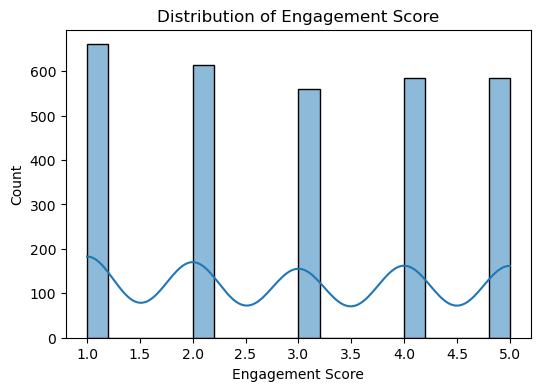

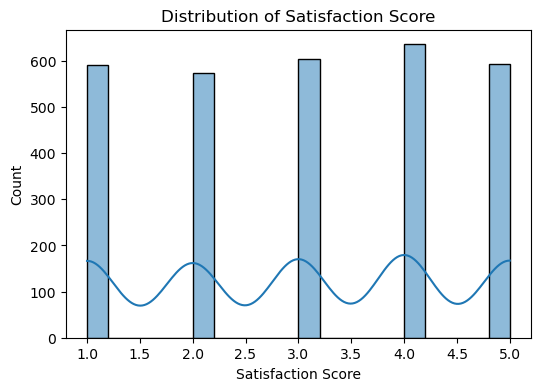

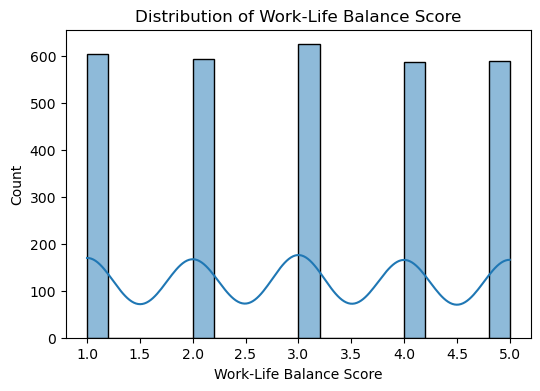

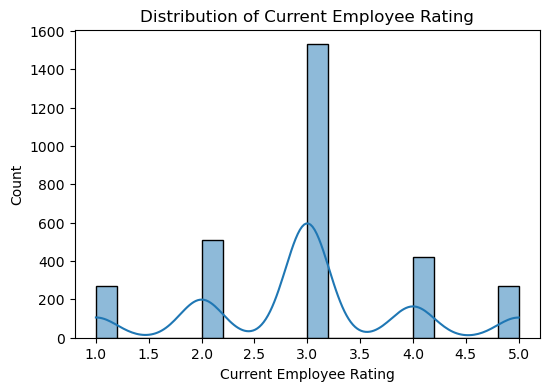

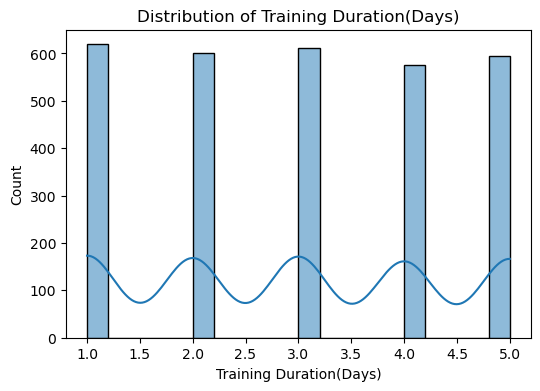

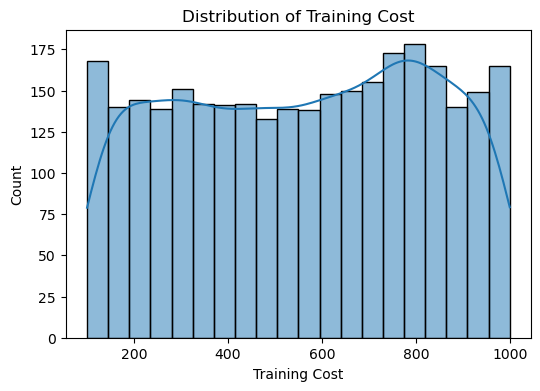

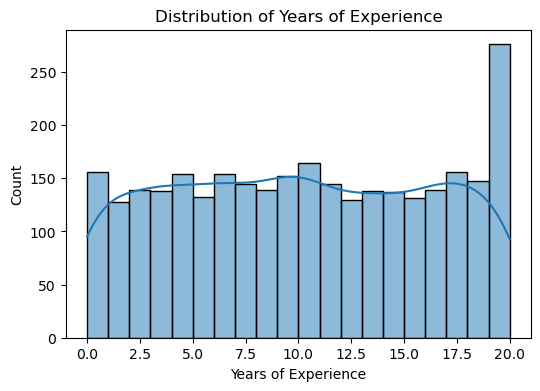

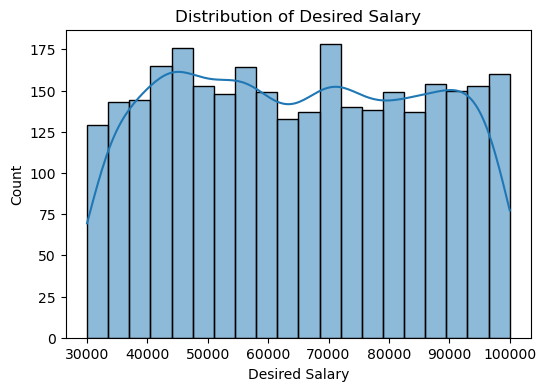

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

for col in num_cols:
    if col in merged_df.columns:
        plt.figure(figsize=(6,4))
        sns.histplot(merged_df[col], kde=True, bins=20)
        plt.title(f'Distribution of {col}')
        plt.show()


In [13]:
import numpy as np

# cap outliers at 1st and 99th percentile
for col in ['Training Cost', 'Desired Salary', 'Years of Experience']:
    if col in merged_df.columns:
        lower = merged_df[col].quantile(0.01)
        upper = merged_df[col].quantile(0.99)
        merged_df[col] = np.clip(merged_df[col], lower, upper)


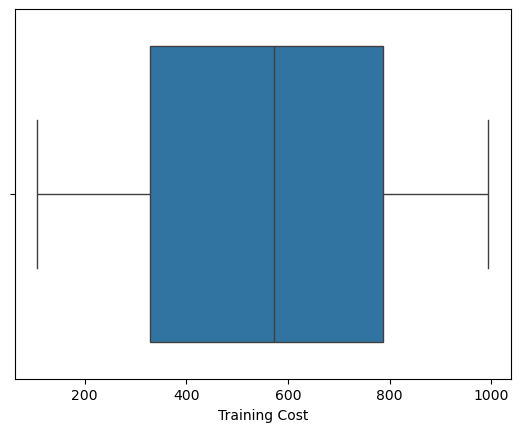

In [14]:
sns.boxplot(x=merged_df['Training Cost'])
plt.show()


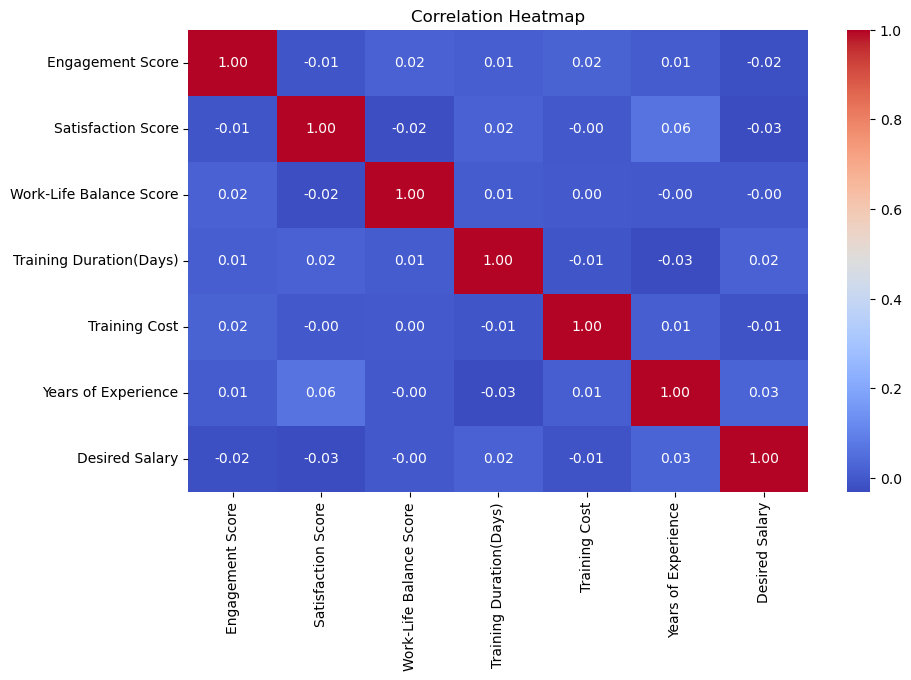

In [15]:
plt.figure(figsize=(10,6))
corr = merged_df[['Engagement Score','Satisfaction Score','Work-Life Balance Score',
                  'Training Duration(Days)','Training Cost','Years of Experience','Desired Salary']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


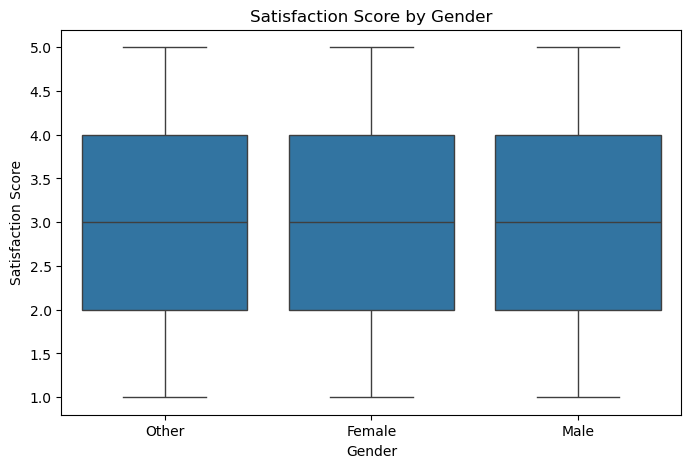

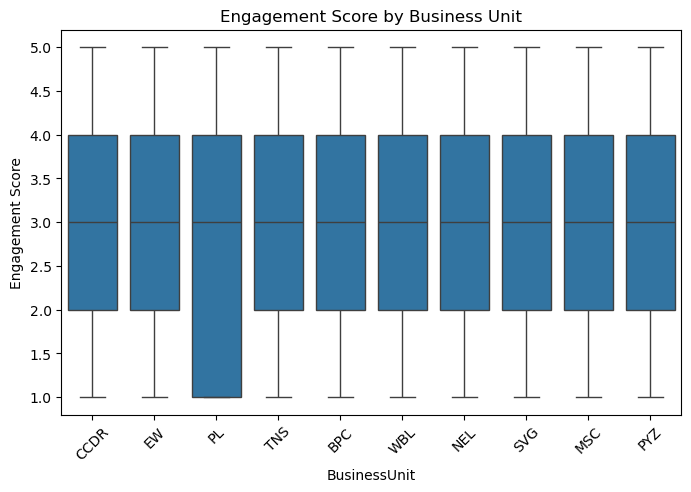

In [16]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Gender', y='Satisfaction Score', data=merged_df)
plt.title('Satisfaction Score by Gender')
plt.show()

plt.figure(figsize=(8,5))
sns.boxplot(x='BusinessUnit', y='Engagement Score', data=merged_df)
plt.title('Engagement Score by Business Unit')
plt.xticks(rotation=45)
plt.show()


In [17]:
pd.crosstab(merged_df['Gender'], merged_df['Performance Score'], normalize='index') * 100


Performance Score,Exceeds,Fully Meets,Needs Improvement,PIP
Gender,,,,
Female,11.168563,79.214064,6.618407,2.998966
Male,14.951456,77.378641,4.951456,2.718447
Other,10.667996,79.561316,6.181456,3.589232


In [18]:
pd.crosstab(merged_df['BusinessUnit'], merged_df['Training Outcome'], normalize='index') * 100


Training Outcome,Completed,Failed,Incomplete,Passed
BusinessUnit,,,,
BPC,21.452145,24.752475,29.702970,24.092409
CCDR,22.666667,21.000000,31.000000,25.333333
EW,25.827815,24.503311,24.503311,25.165563
MSC,26.351351,20.945946,27.702703,25.000000
NEL,23.026316,25.657895,26.315789,25.000000
PL,24.916944,28.239203,22.923588,23.920266
PYZ,24.080268,21.404682,29.765886,24.749164
SVG,32.236842,23.684211,22.039474,22.039474
TNS,30.639731,24.915825,19.191919,25.252525


                                                          T-TEST

In [19]:
from scipy.stats import ttest_ind

male_eng = merged_df[merged_df['Gender'] == 'Male']['Engagement Score']
female_eng = merged_df[merged_df['Gender'] == 'Female']['Engagement Score']

t_stat, p_val = ttest_ind(male_eng, female_eng, nan_policy='omit')
print(f"T-Statistic: {t_stat:.3f}, P-Value: {p_val:.3f}")


T-Statistic: -1.244, P-Value: 0.214


                                                              ANOVA

In [20]:
from scipy.stats import f_oneway

groups = [data['Engagement Score'].dropna().values 
          for name, data in merged_df.groupby('BusinessUnit')]

f_stat, p_val = f_oneway(*groups)
print(f"F-Statistic: {f_stat:.3f}, P-Value: {p_val:.3f}")


F-Statistic: 0.872, P-Value: 0.550


                                                        CORRELATION - HEAT MAP 

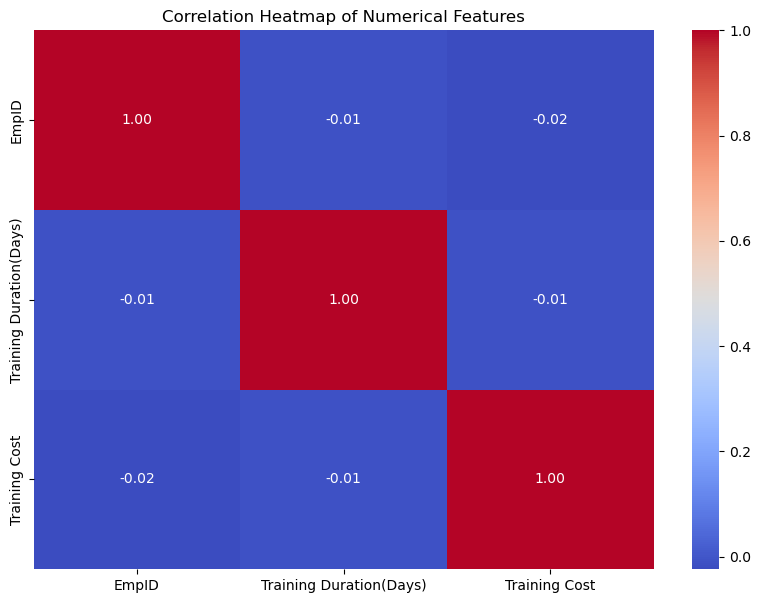

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = df.corr(numeric_only=True)
plt.figure(figsize=(10,7))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

In [30]:
merged_df = (
    employee_df
    .merge(survey_df, left_on='EmpID', right_on='Employee_ID', how='left')
    .merge(training_df, left_on='EmpID', right_on='Employee_ID', how='left')
)



In [31]:
merged_df.drop(['Employee_ID_x', 'Employee_ID_y'], axis=1, inplace=True)



In [32]:
print("Merged shape:", merged_df.shape)
print("Columns:", merged_df.columns.tolist())
merged_df.head()


Merged shape: (3000, 38)
Columns: ['EmpID', 'FirstName', 'LastName', 'StartDate', 'ExitDate', 'Title', 'Supervisor', 'ADEmail', 'BusinessUnit', 'EmployeeStatus', 'EmployeeType', 'PayZone', 'EmployeeClassificationType', 'TerminationType', 'TerminationDescription', 'DepartmentType', 'Division', 'DOB', 'State', 'JobFunctionDescription', 'GenderCode', 'LocationCode', 'RaceDesc', 'MaritalDesc', 'Performance_Score', 'Current_Employee_Rating', 'Survey_Date', 'Engagement_Score', 'Satisfaction_Score', 'Work-Life_Balance_Score', 'Training_Date', 'Training_Program_Name', 'Training_Type', 'Training_Outcome', 'Location', 'Trainer', 'Training_Duration(Days)', 'Training_Cost']


,EmpID,FirstName,LastName,StartDate,ExitDate,Title,Supervisor,ADEmail,BusinessUnit,EmployeeStatus,...,Satisfaction_Score,Work-Life_Balance_Score,Training_Date,Training_Program_Name,Training_Type,Training_Outcome,Location,Trainer,Training_Duration(Days),Training_Cost
0,3427,Uriah,Bridges,20-Sep-19,NaN,Production Technician I,Peter Oneill,uriah.bridges@bilearner.com,CCDR,Active,...,2,3,15-Jul-23,Leadership Development,Internal,Failed,South Marisa,Taylor Rodriguez,2,606.11
1,3428,Paula,Small,11-Feb-23,NaN,Production Technician I,Renee Mccormick,paula.small@bilearner.com,EW,Active,...,1,5,12-Sep-22,Customer Service,External,Incomplete,Tammieville,Kelly Patterson DDS,4,673.02
2,3429,Edward,Buck,10-Dec-18,NaN,Area Sales Manager,Crystal Walker,edward.buck@bilearner.com,PL,Active,...,2,1,13-Aug-22,Leadership Development,External,Failed,East Roberthaven,Taylor Thomas,2,413.28
3,3430,Michael,Riordan,21-Jun-21,NaN,Area Sales Manager,Rebekah Wright,michael.riordan@bilearner.com,CCDR,Active,...,5,4,15-Dec-22,Project Management,External,Completed,Garzatown,Holly Elliott,3,663.78
4,3431,Jasmine,Onque,29-Jun-19,NaN,Area Sales Manager,Jason Kim,jasmine.onque@bilearner.com,TNS,Active,...,5,3,13-Jul-23,Technical Skills,External,Failed,Lake Meganville,Donald Martinez,5,399.03


                                                                 Random forest

In [33]:
model_df = merged_df[[
    'Engagement_Score',
    'Satisfaction_Score',
    'Work-Life_Balance_Score',
    'Training_Cost',
    'Training_Duration(Days)',
    'Performance_Score',
    'Current_Employee_Rating'
]].copy()


In [34]:
model_df = model_df.dropna(subset=['Engagement_Score'])
model_df.fillna(model_df.mean(numeric_only=True), inplace=True)


In [35]:
from sklearn.model_selection import train_test_split

X = model_df.drop('Engagement_Score', axis=1)
y = model_df['Engagement_Score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [37]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


df_model = merged_df.dropna(subset=['Engagement_Score'])

# these are porbably the features
X = df_model.drop(['Engagement_Score', 'EmpID', 'FirstName', 'LastName', 'ADEmail', 'Supervisor', 'DOB', 'ExitDate', 'StartDate'], axis=1, errors='ignore')
y = df_model['Engagement_Score']

for col in X.select_dtypes(include='object').columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col].astype(str))

# Spliting into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)


y_pred = rf.predict(X_test)

# Evaluating the R2 square
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"R² Score: {r2:.3f}")
print(f"Mean Squared Error: {mse:.3f}")


R² Score: -0.028
Mean Squared Error: 2.092


In [38]:
import pandas as pd

importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)

print("\nTop 10 Important Features:")
print(importances.head(10))



Top 10 Important Features:
Trainer                   0.088076
Training_Date             0.081743
LocationCode              0.080297
Training_Cost             0.080045
Location                  0.079542
Survey_Date               0.073830
JobFunctionDescription    0.050951
Division                  0.041733
BusinessUnit              0.039821
TerminationDescription    0.038432
dtype: float64


In [39]:
merged_df.to_csv(r"C:\Users\GILL\merged_hr_for_powerbi.csv", index=False)
